## Problem statement

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\Second-Phase-Practice-Projects--2-\World Happiness\World Happiness dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Analising basic metrics

- Country : Name of the country
- Region : Region Area in which country is present
- Happiness Rank : Simple ranking index(we can remove this column)
- Happiness Score : It is the measure of subjective well-being
- Standard Error :  standard deviation and dividing it by the square root of the sample size
- Economy (GDP per Capita) :a monetary measure of the market value of all the final goods and services produced in a specific time period by a country or countries
- Family : is the national average of the binary responses s (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
- Health (Life Expectancy) :  Healthy life expectancies at birth 
- Freedom : Freedom to make life choices is the national average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

- Trust (Government Corruption) :The first principal component of the following five measures:
    - confidence in the national government
    - confidence in the judicial system and courts
    - confidence in the honesty of elections
    - confidence in the local police force,and perceived corruption in business.
- Generosity : the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- Dystopia Residual : Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

#### Analising basic metrics

In [4]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- From above analysis it seems that there are no null values

In [6]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

- from above analysis we can say that region rank and country are  categorical data remaining columns are continous

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- from above analysis we can say that there is almost no skeweness in most of the columns since there is very very less difference between mean and median.
- a slight skeweness can be seen in Economy,health and trust columns.
- outliers might be present in standerd error,trust and generosity columns since there is significant difference between max and 3rd quartile

### Univariate analysis

In [8]:
df['Country'].nunique()


158

In [9]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [10]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

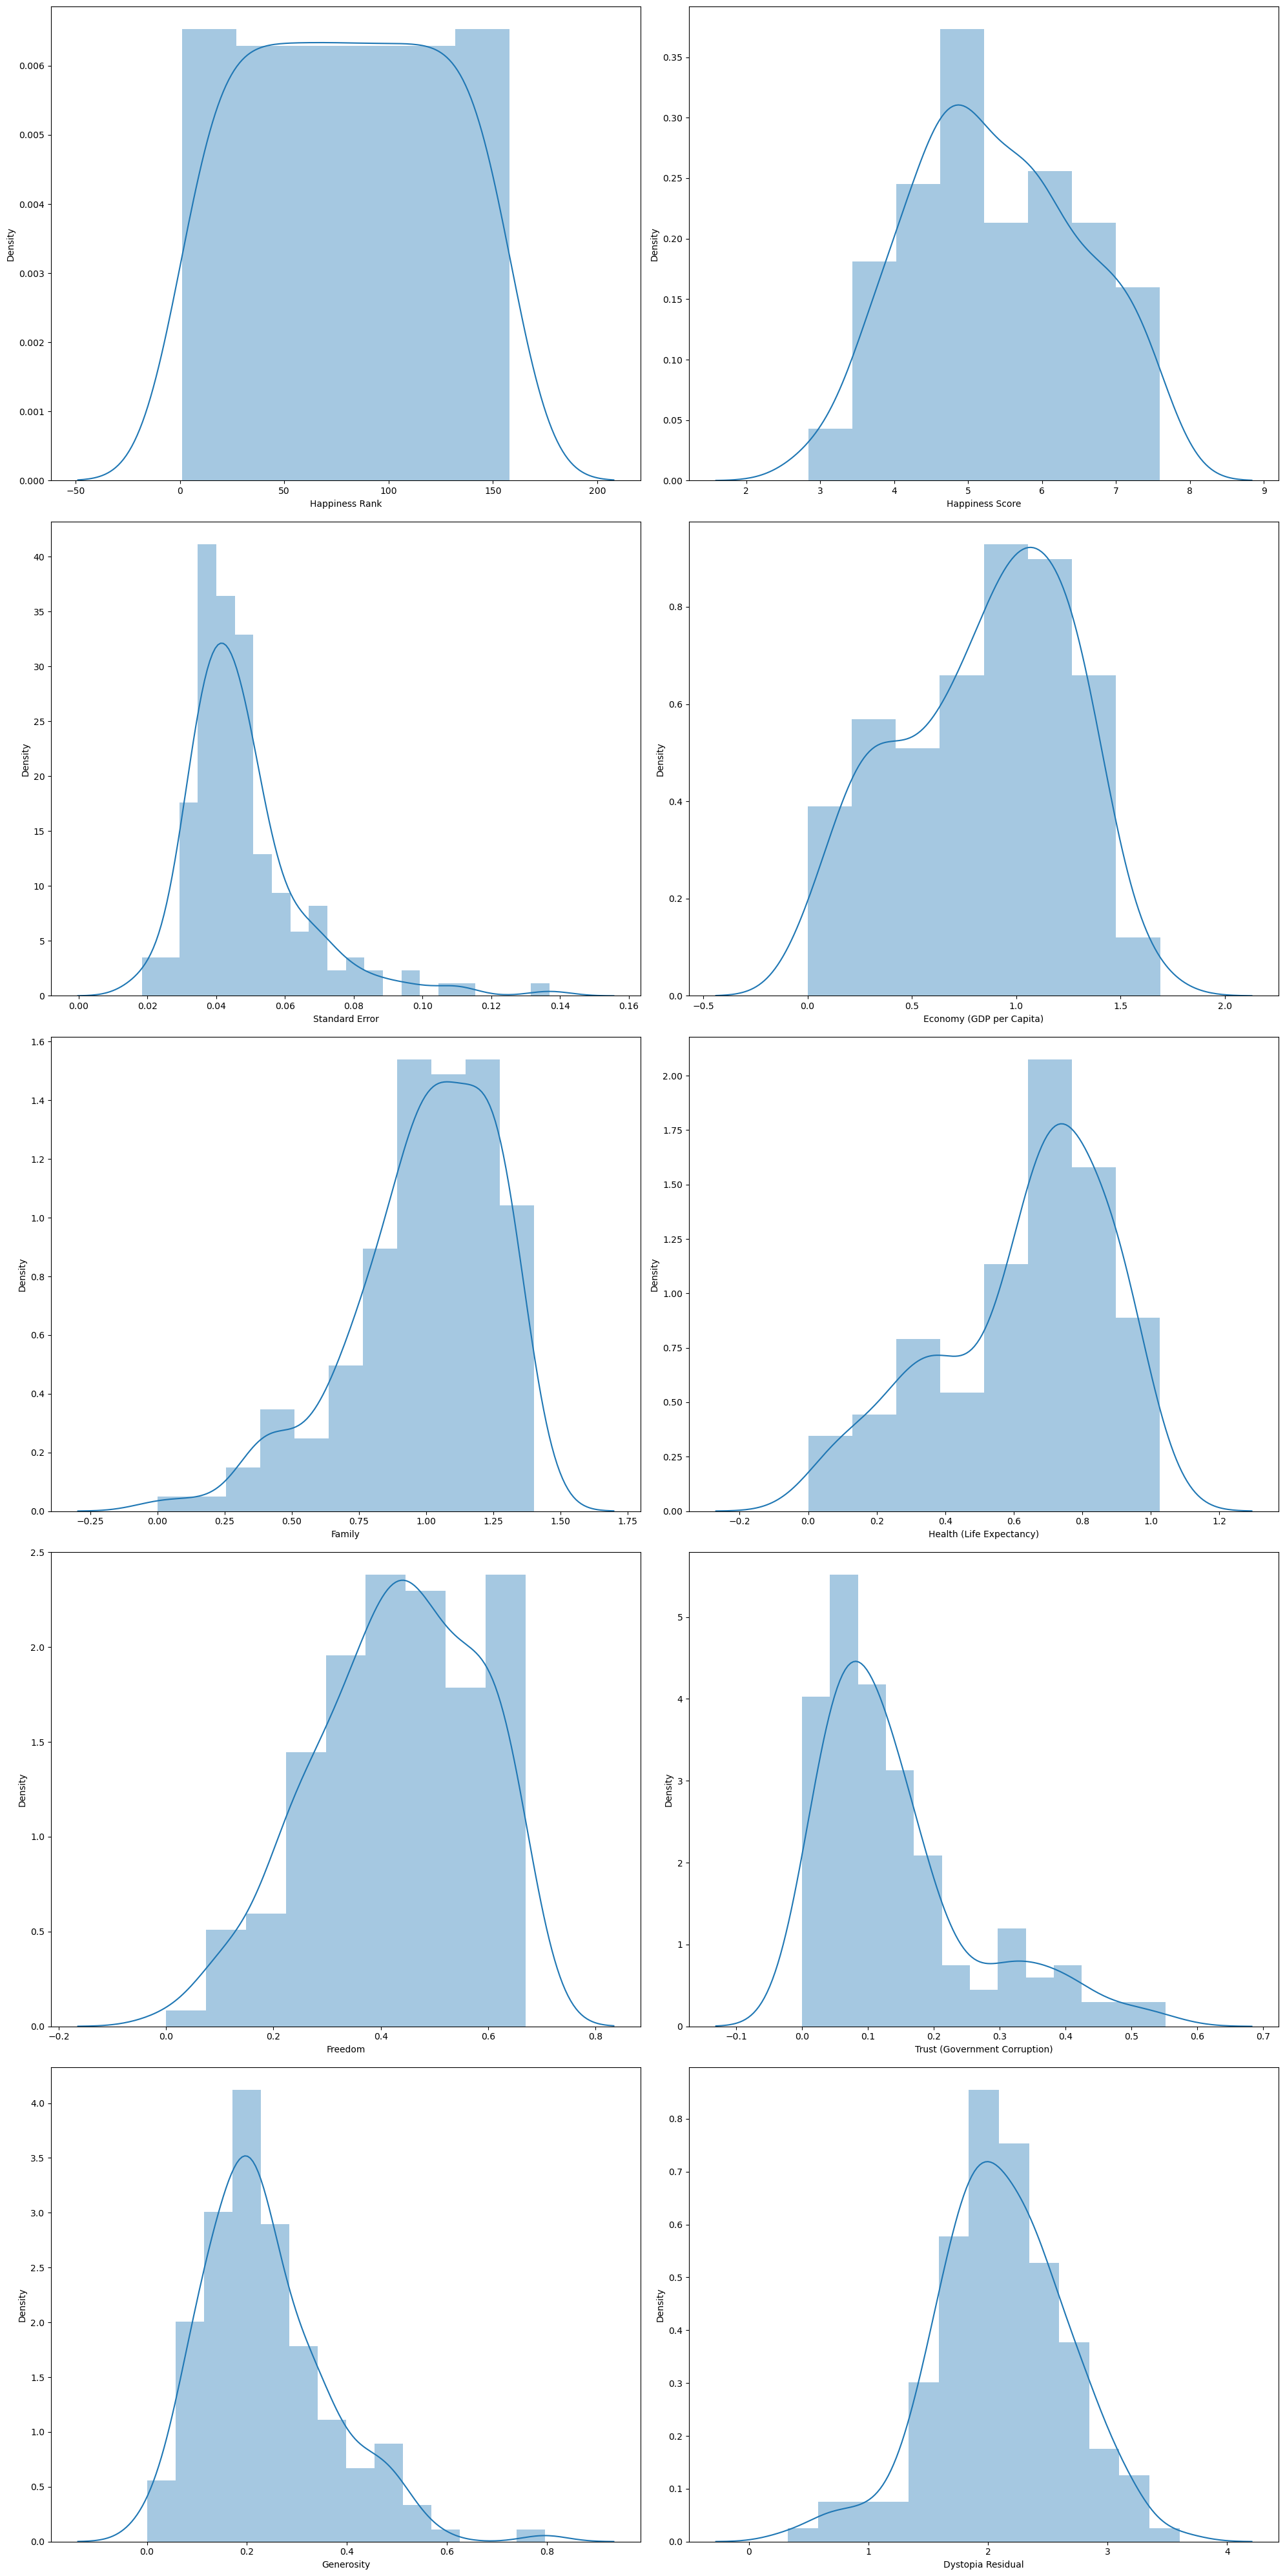

In [11]:
plt.figure(figsize=(20,40))
pn=1
for i in numeric_columns:
    
    
    sns.distplot(df[i],ax=plt.subplot(5,2,pn))
    plt.xlabel(i)
    pn += 1
    
plt.tight_layout()  

- a little right skeweness can be observed in standerd error and thrust columns
- a little left skeweness can be observed in Family column
- every value in country column is unique

### Bivariate Analysis

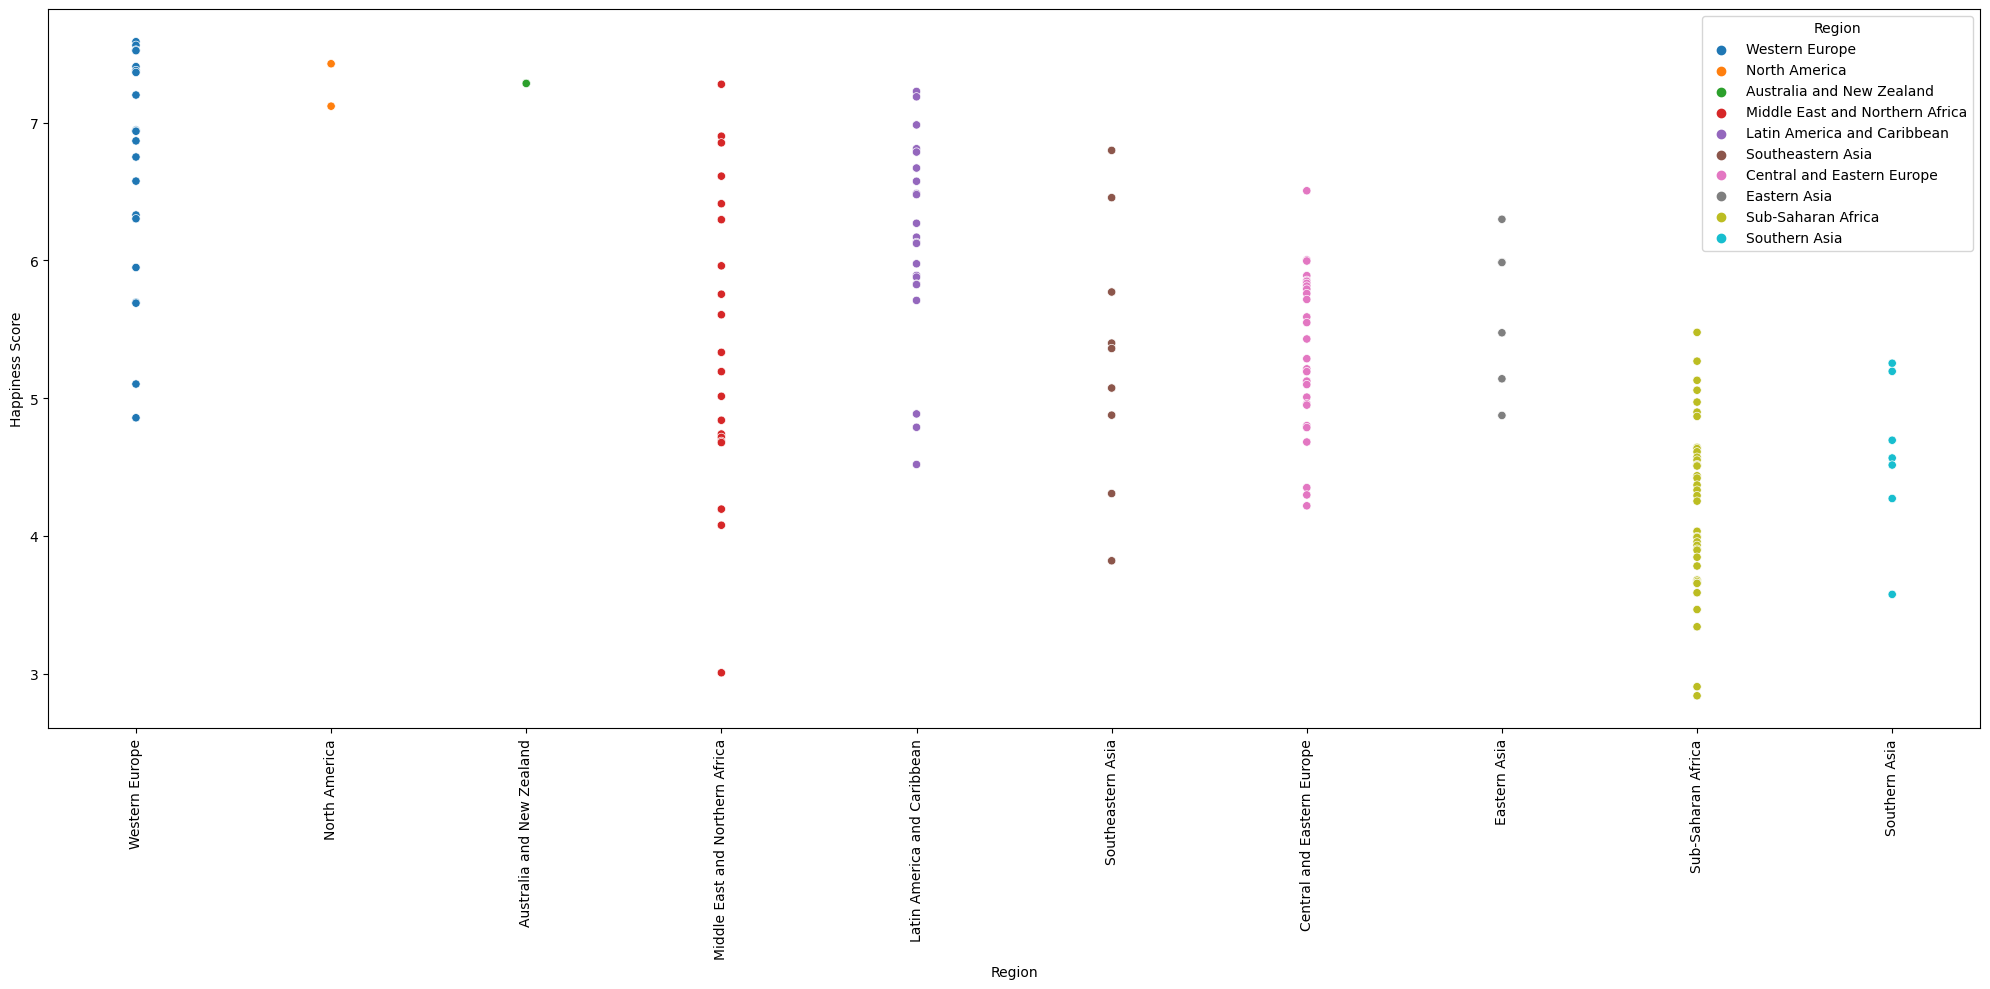

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='Region',y='Happiness Score',hue='Region')
plt.xticks(rotation=90, ha='center')

plt.tight_layout()

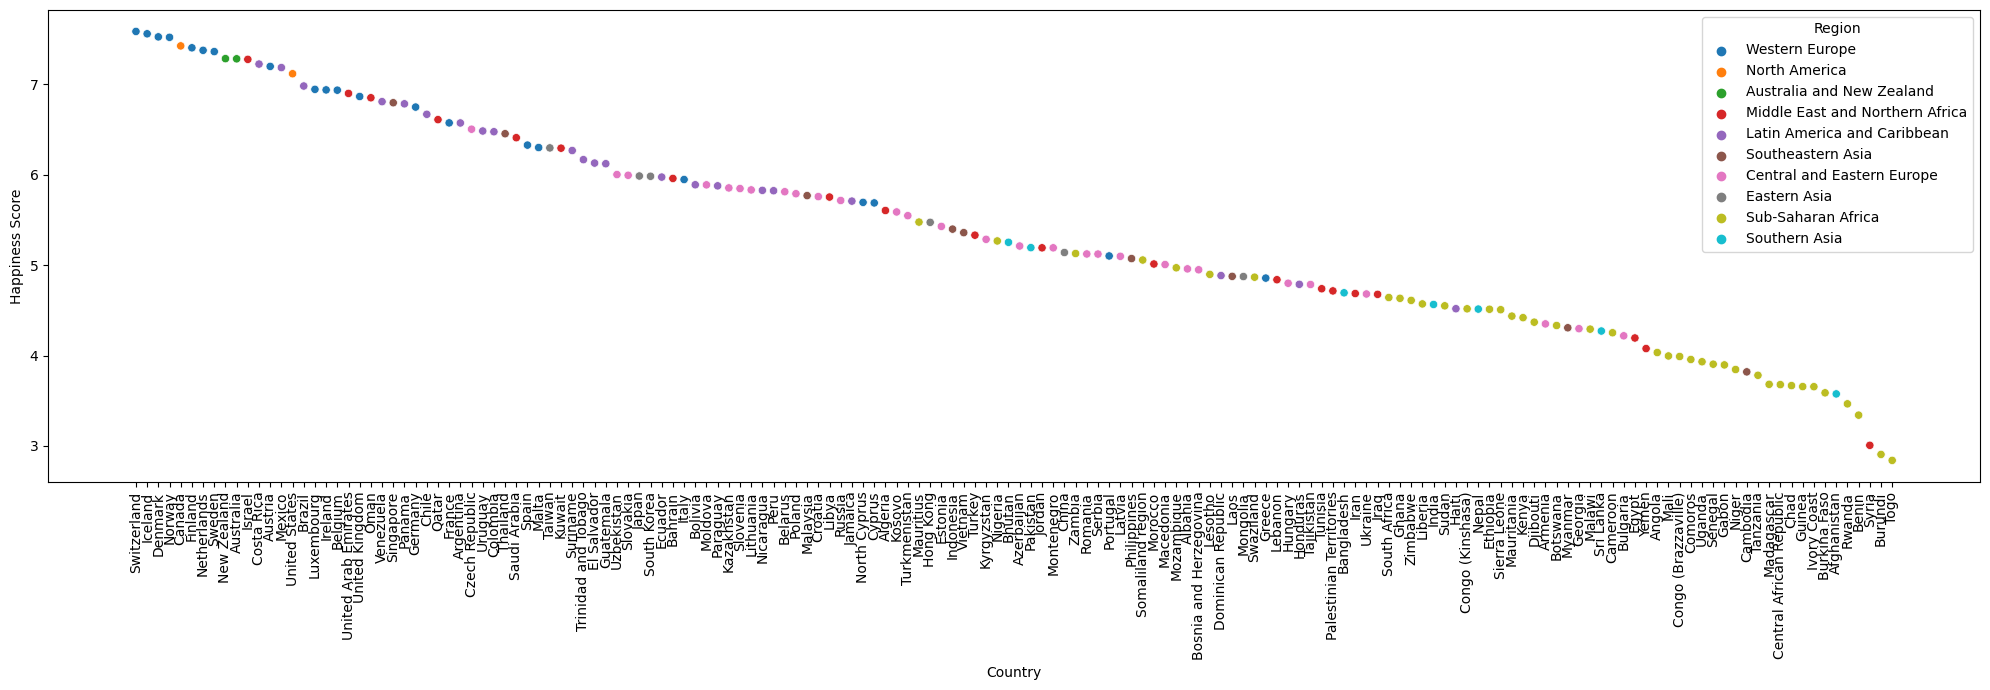

In [13]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x='Country',y='Happiness Score',hue='Region')
plt.xticks(rotation=90, ha='center')

plt.tight_layout()

- we can obseve that happiness score of western europe,north america,austrelia and newzeland is higher as compared to others
- we can obseve that happiness score of Sub-Sahara africa  is least 

<AxesSubplot: xlabel='Happiness Rank', ylabel='Happiness Score'>

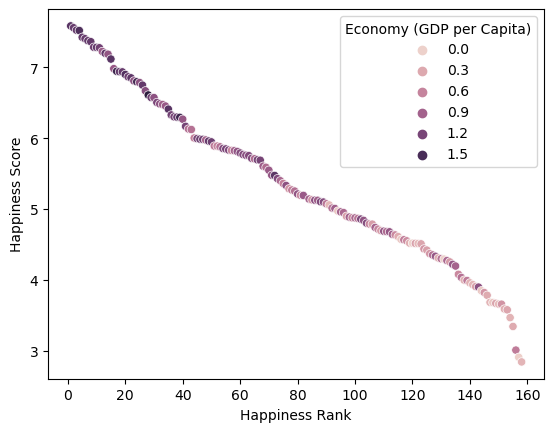

In [14]:
sns.scatterplot(data=df,x='Happiness Rank',y='Happiness Score',hue='Economy (GDP per Capita)')

- as gdp dicreases happiness rank and happiness score also dicreases

<AxesSubplot: xlabel='Standard Error', ylabel='Happiness Score'>

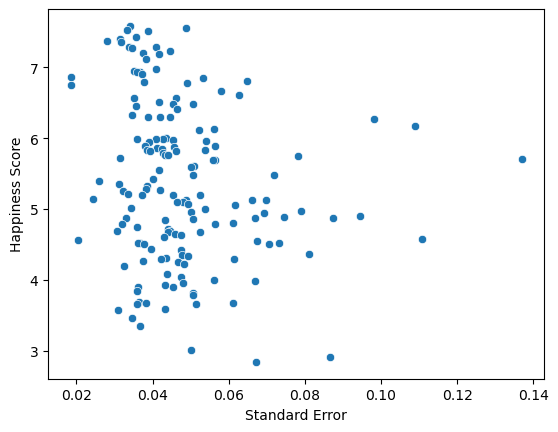

In [15]:
sns.scatterplot(data=df,x='Standard Error',y='Happiness Score')

<AxesSubplot: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

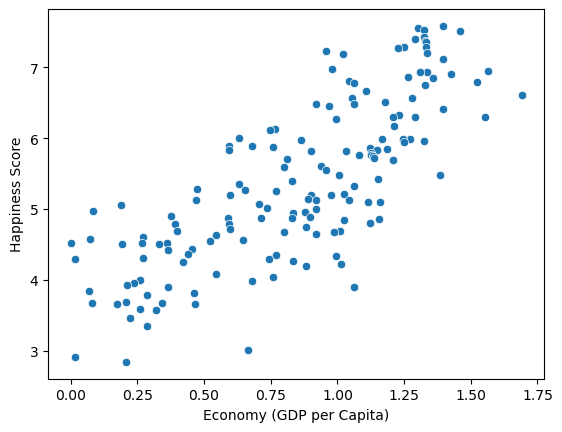

In [16]:
sns.scatterplot(data=df,x='Economy (GDP per Capita)',y='Happiness Score')

- there is strong positive  corelation between standerd error and happiness score 

<AxesSubplot: xlabel='Family', ylabel='Happiness Score'>

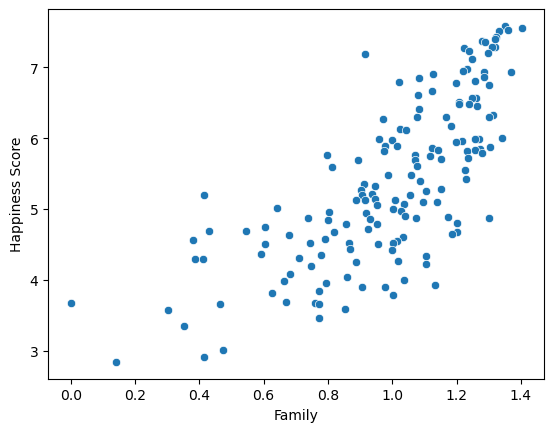

In [17]:
sns.scatterplot(data=df,x='Family',y='Happiness Score')

- happiness score increase with increase in family support

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

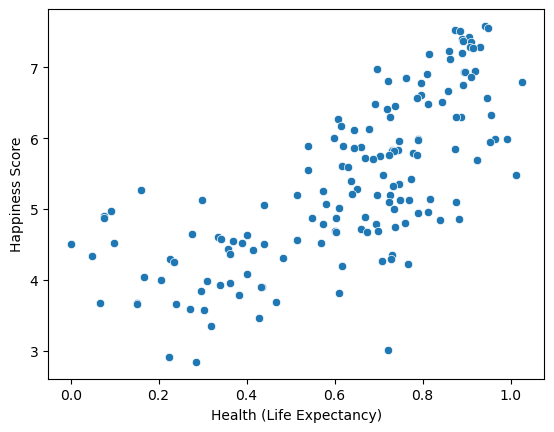

In [18]:







sns.scatterplot(data=df,x='Health (Life Expectancy)',y='Happiness Score')


- there is positive  corelation between Health (Life Expectancy) and happiness score 

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

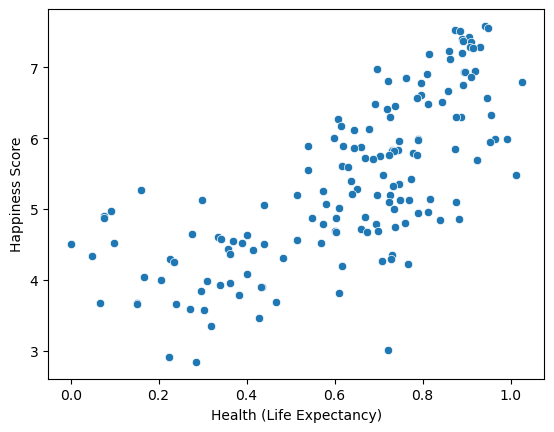

In [19]:
sns.scatterplot(data=df,x='Health (Life Expectancy)',y='Happiness Score')

<AxesSubplot: xlabel='Freedom', ylabel='Happiness Score'>

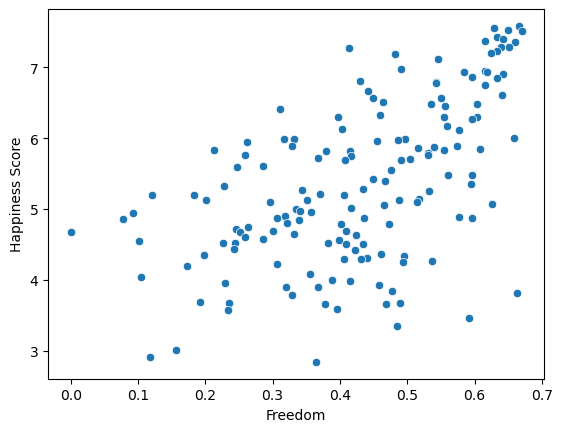

In [20]:
sns.scatterplot(data=df,x='Freedom',y='Happiness Score')

<AxesSubplot: xlabel='Trust (Government Corruption)', ylabel='Generosity'>

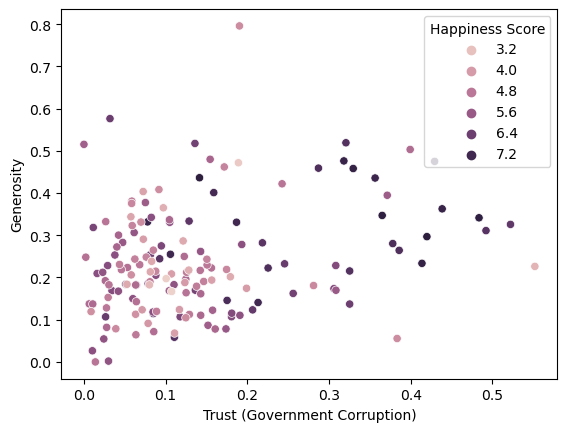

In [21]:
sns.scatterplot(data=df,x='Trust (Government Corruption)',y='Generosity',hue='Happiness Score')

<AxesSubplot: xlabel='Dystopia Residual', ylabel='Happiness Score'>

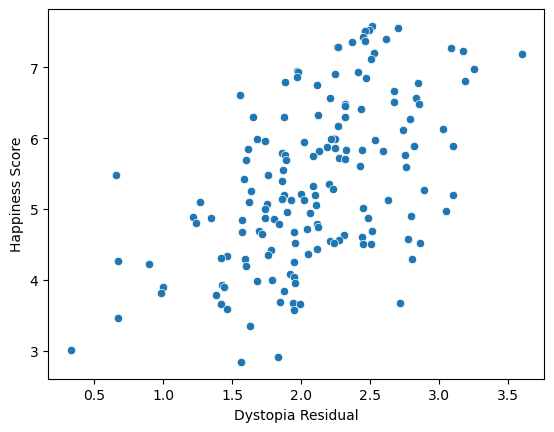

In [22]:
sns.scatterplot(data=df,x='Dystopia Residual',y='Happiness Score')

- we can say that there is positive corelation between happiness score and Dystopia Residual

### Encoading catogerical data

In [23]:
df1 = pd.DataFrame(df,columns=df.columns)

In [24]:
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
# Labelencoader for country
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
df1['Country']=lenc.fit_transform(df1['Country'])
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
# Encoading region using pd.getdummies
dummies = pd.get_dummies(df['Region'])
df1.drop(columns='Region',inplace=True)
df1=df1.join(dummies)
df1

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,0,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,...,0,0,0,0,0,0,0,0,1,0
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,0,0,0,0,0,0,0,0,1,0
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,0,0,0,0,1,0,0,0,0,0
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,0,0,0,0,0,0,0,0,1,0


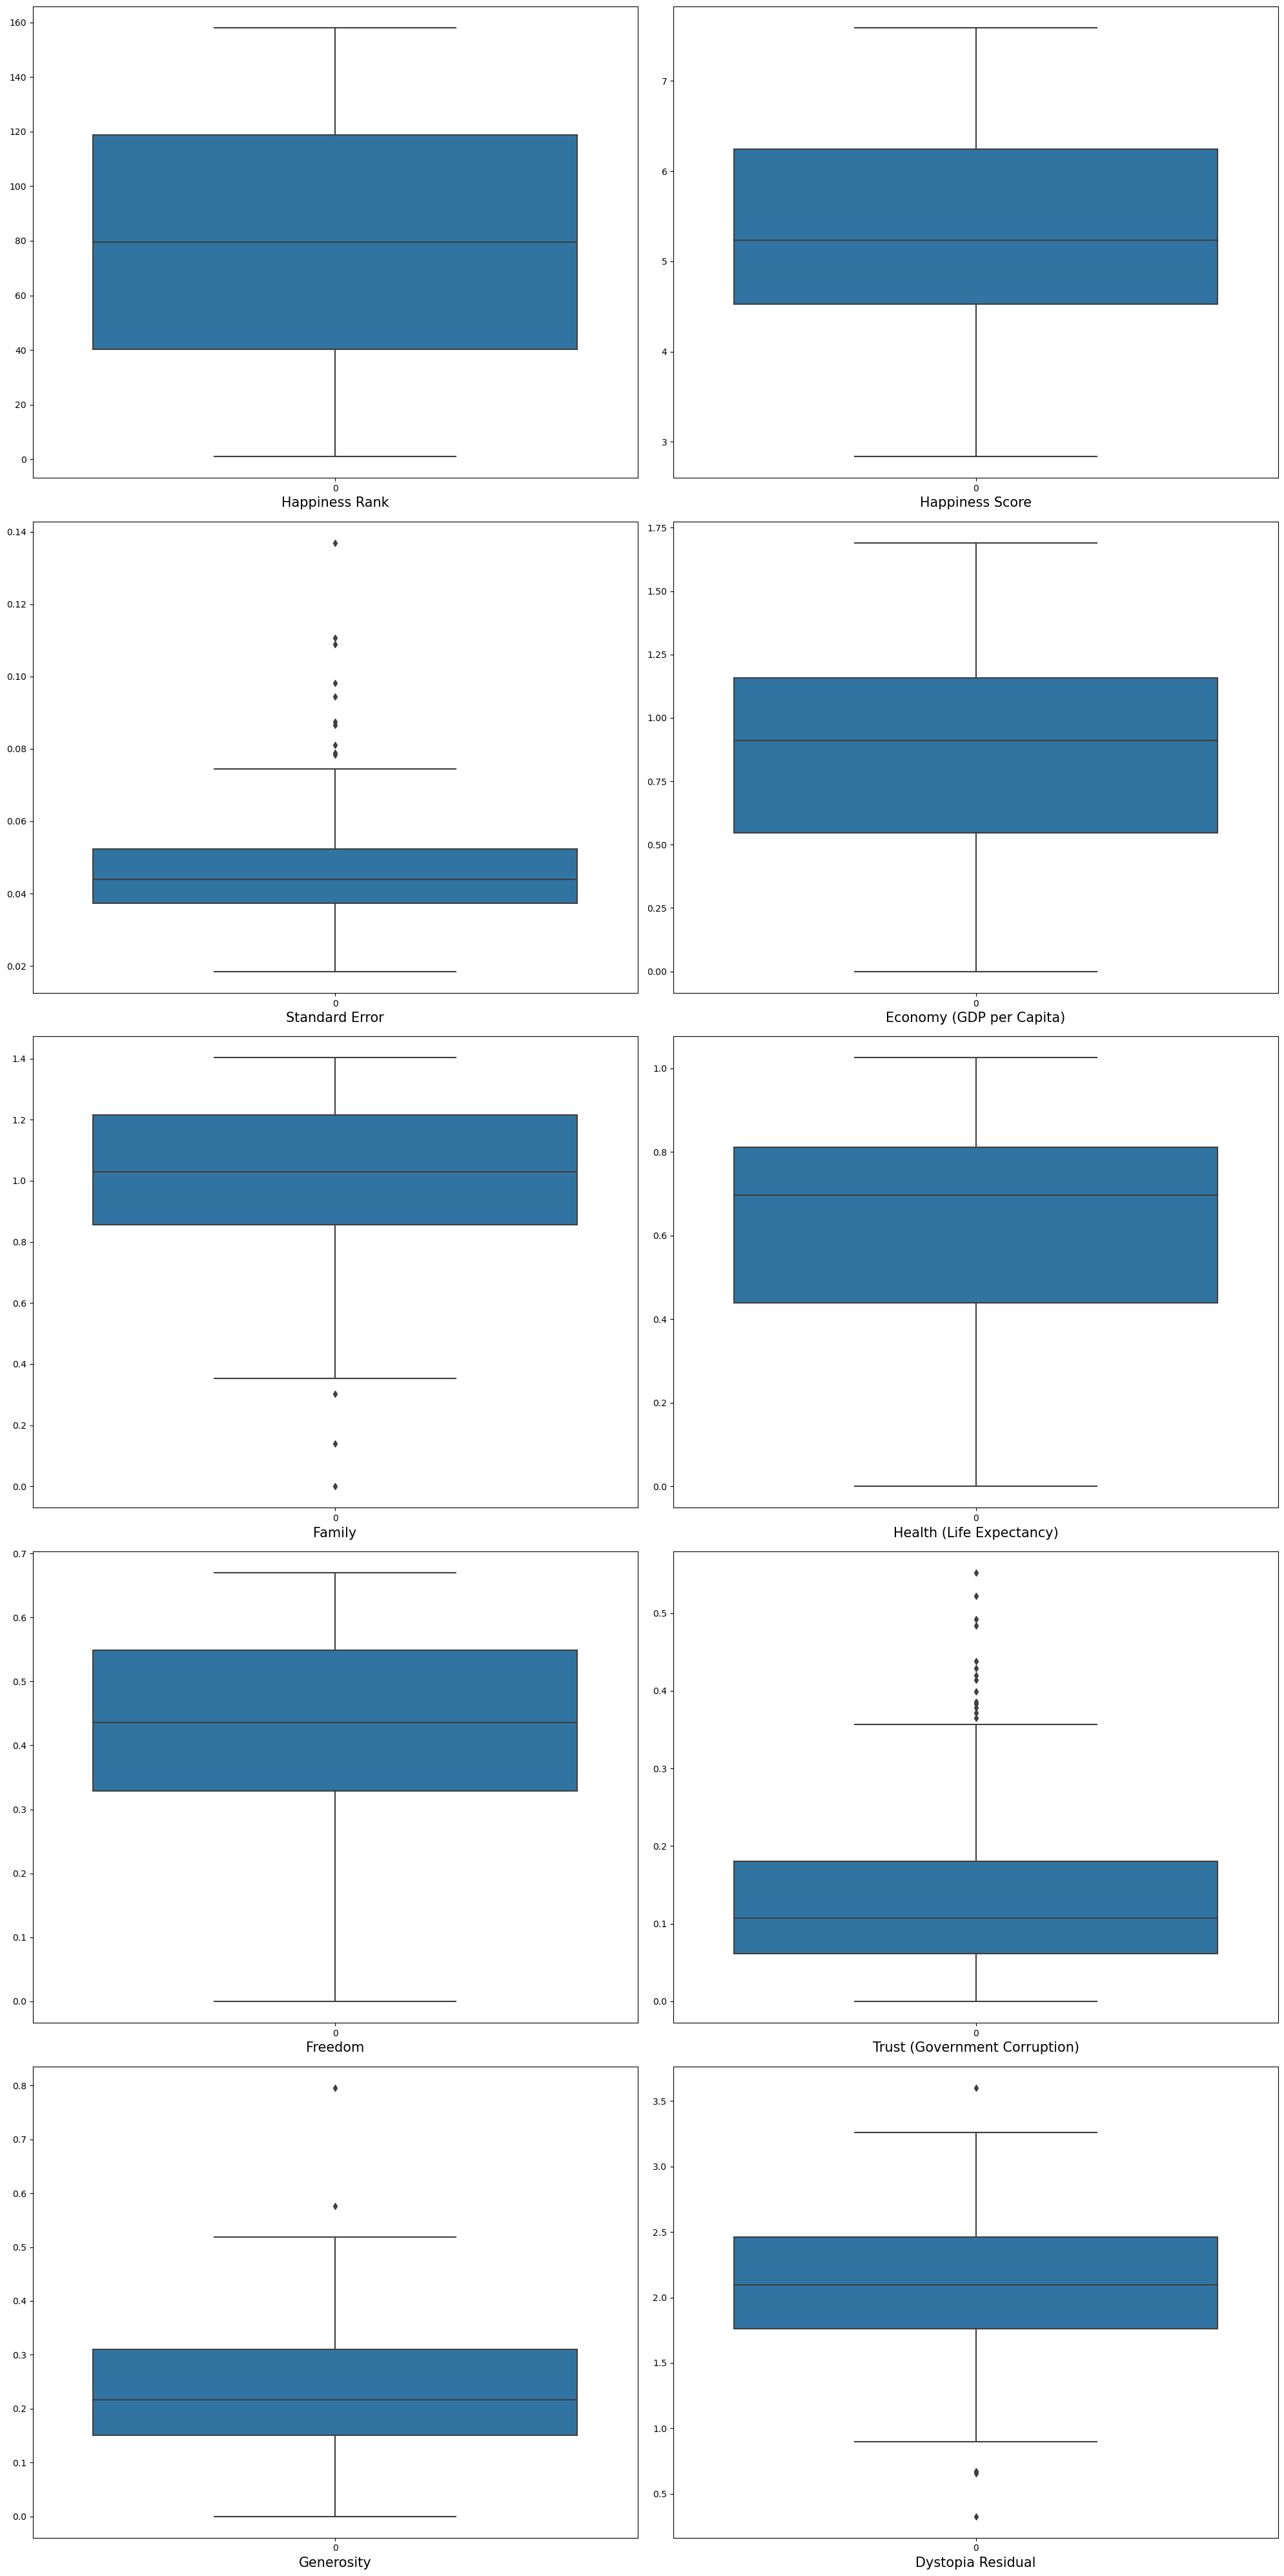

In [27]:
plt.figure(figsize=(20,40))
pn=1
for i in numeric_columns:
    
    
    sns.boxplot(df1[i],ax=plt.subplot(5,2,pn))
    plt.xlabel(i,fontsize = 15)
    pn += 1
    
plt.tight_layout()  

- We can observe that there are some outliers in Standerd error,Family,Trust,Generosity and Dystopia Residual

In [28]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df1[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]))
z[z>3].count()

Standard Error                   3
Family                           2
Trust (Government Corruption)    2
Generosity                       1
Dystopia Residual                1
dtype: int64

In [29]:
df1[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]=df1[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']][z<3]

df1

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,0,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,NaN,0.22628,...,0,0,0,0,0,0,0,0,1,0
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,0,0,0,0,0,0,0,0,1,0
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,0,0,0,0,1,0,0,0,0,0
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df1 = df1.dropna()
df1.reset_index(drop=True,inplace=True)
df1

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,0,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,66,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,...,0,0,0,0,0,0,0,0,1,0
145,20,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,...,0,0,0,0,0,0,0,0,1,0
146,0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,...,0,0,0,0,0,0,0,1,0,0
147,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,0,0,0,0,0,0,0,0,1,0


####  we lost 9 rows of data because of outliers

### Skeweness

In [31]:
df1[numeric_columns].skew().abs()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)         0.390657
Family                           0.811340
Health (Life Expectancy)         0.747711
Freedom                          0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual                0.021144
dtype: float64

In [32]:
np.where(df1[numeric_columns].skew().abs() > 0.5)[0]

array([2, 4, 5, 7, 8], dtype=int64)

- Skeweness needs to be reduced in these columns whre skeweness is > 0.5 using power transform method

In [33]:
skew_columns = [numeric_columns[i] for i in np.where(df[numeric_columns].skew().abs() > 0.5)[0]]

In [34]:
skew_columns

['Standard Error',
 'Family',
 'Health (Life Expectancy)',
 'Trust (Government Corruption)',
 'Generosity']

In [35]:
x=df1.drop(columns='Happiness Score')
y = df1['Happiness Score']

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x[skew_columns] = pt.fit_transform(x[skew_columns])
x

,Country,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,0.022404,1.39651,5.563267,2.318521,0.66557,0.153634,0.207111,2.51738,0,0,0,0,0,0,0,0,0,1
1,58,2,0.027366,1.30232,6.042358,2.346570,0.62877,0.093490,0.265247,2.70201,0,0,0,0,0,0,0,0,0,1
2,37,3,0.022064,1.32548,5.661624,2.038287,0.64938,0.159122,0.227561,2.49204,0,0,0,0,0,0,0,0,0,1
3,105,4,0.024194,1.45900,5.400993,2.081193,0.66973,0.147439,0.229994,2.46531,0,0,0,0,0,0,0,0,0,1
4,24,5,0.022969,1.32629,5.329139,2.165608,0.63297,0.142463,0.272943,2.45176,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,66,151,0.028055,0.46534,1.861697,0.179031,0.46866,0.107692,0.156166,1.41723,0,0,0,0,0,0,0,0,1,0
145,20,152,0.025698,0.25812,2.229169,0.362031,0.39493,0.087786,0.165421,1.46494,0,0,0,0,0,0,0,0,1,0
146,0,153,0.021021,0.31982,0.438842,0.418261,0.23414,0.072369,0.237670,1.95210,0,0,0,0,0,0,0,1,0,0
147,13,155,0.023366,0.28665,0.544094,0.446999,0.48450,0.062601,0.144556,1.63328,0,0,0,0,0,0,0,0,1,0


In [37]:
x.skew().abs()

Country                            0.048701
Happiness Rank                     0.003268
Standard Error                     0.031216
Economy (GDP per Capita)           0.390657
Family                             0.148528
Health (Life Expectancy)           0.190663
Freedom                            0.400867
Trust (Government Corruption)      0.174593
Generosity                         0.025172
Dystopia Residual                  0.021144
Australia and New Zealand          8.542815
Central and Eastern Europe         1.558326
Eastern Asia                       4.724802
Latin America and Caribbean        2.167820
Middle East and Northern Africa    2.350787
North America                      8.542815
Southeastern Asia                  4.000403
Southern Asia                      4.325609
Sub-Saharan Africa                 1.219570
Western Europe                     2.084855
dtype: float64

#### Corelation Analysis

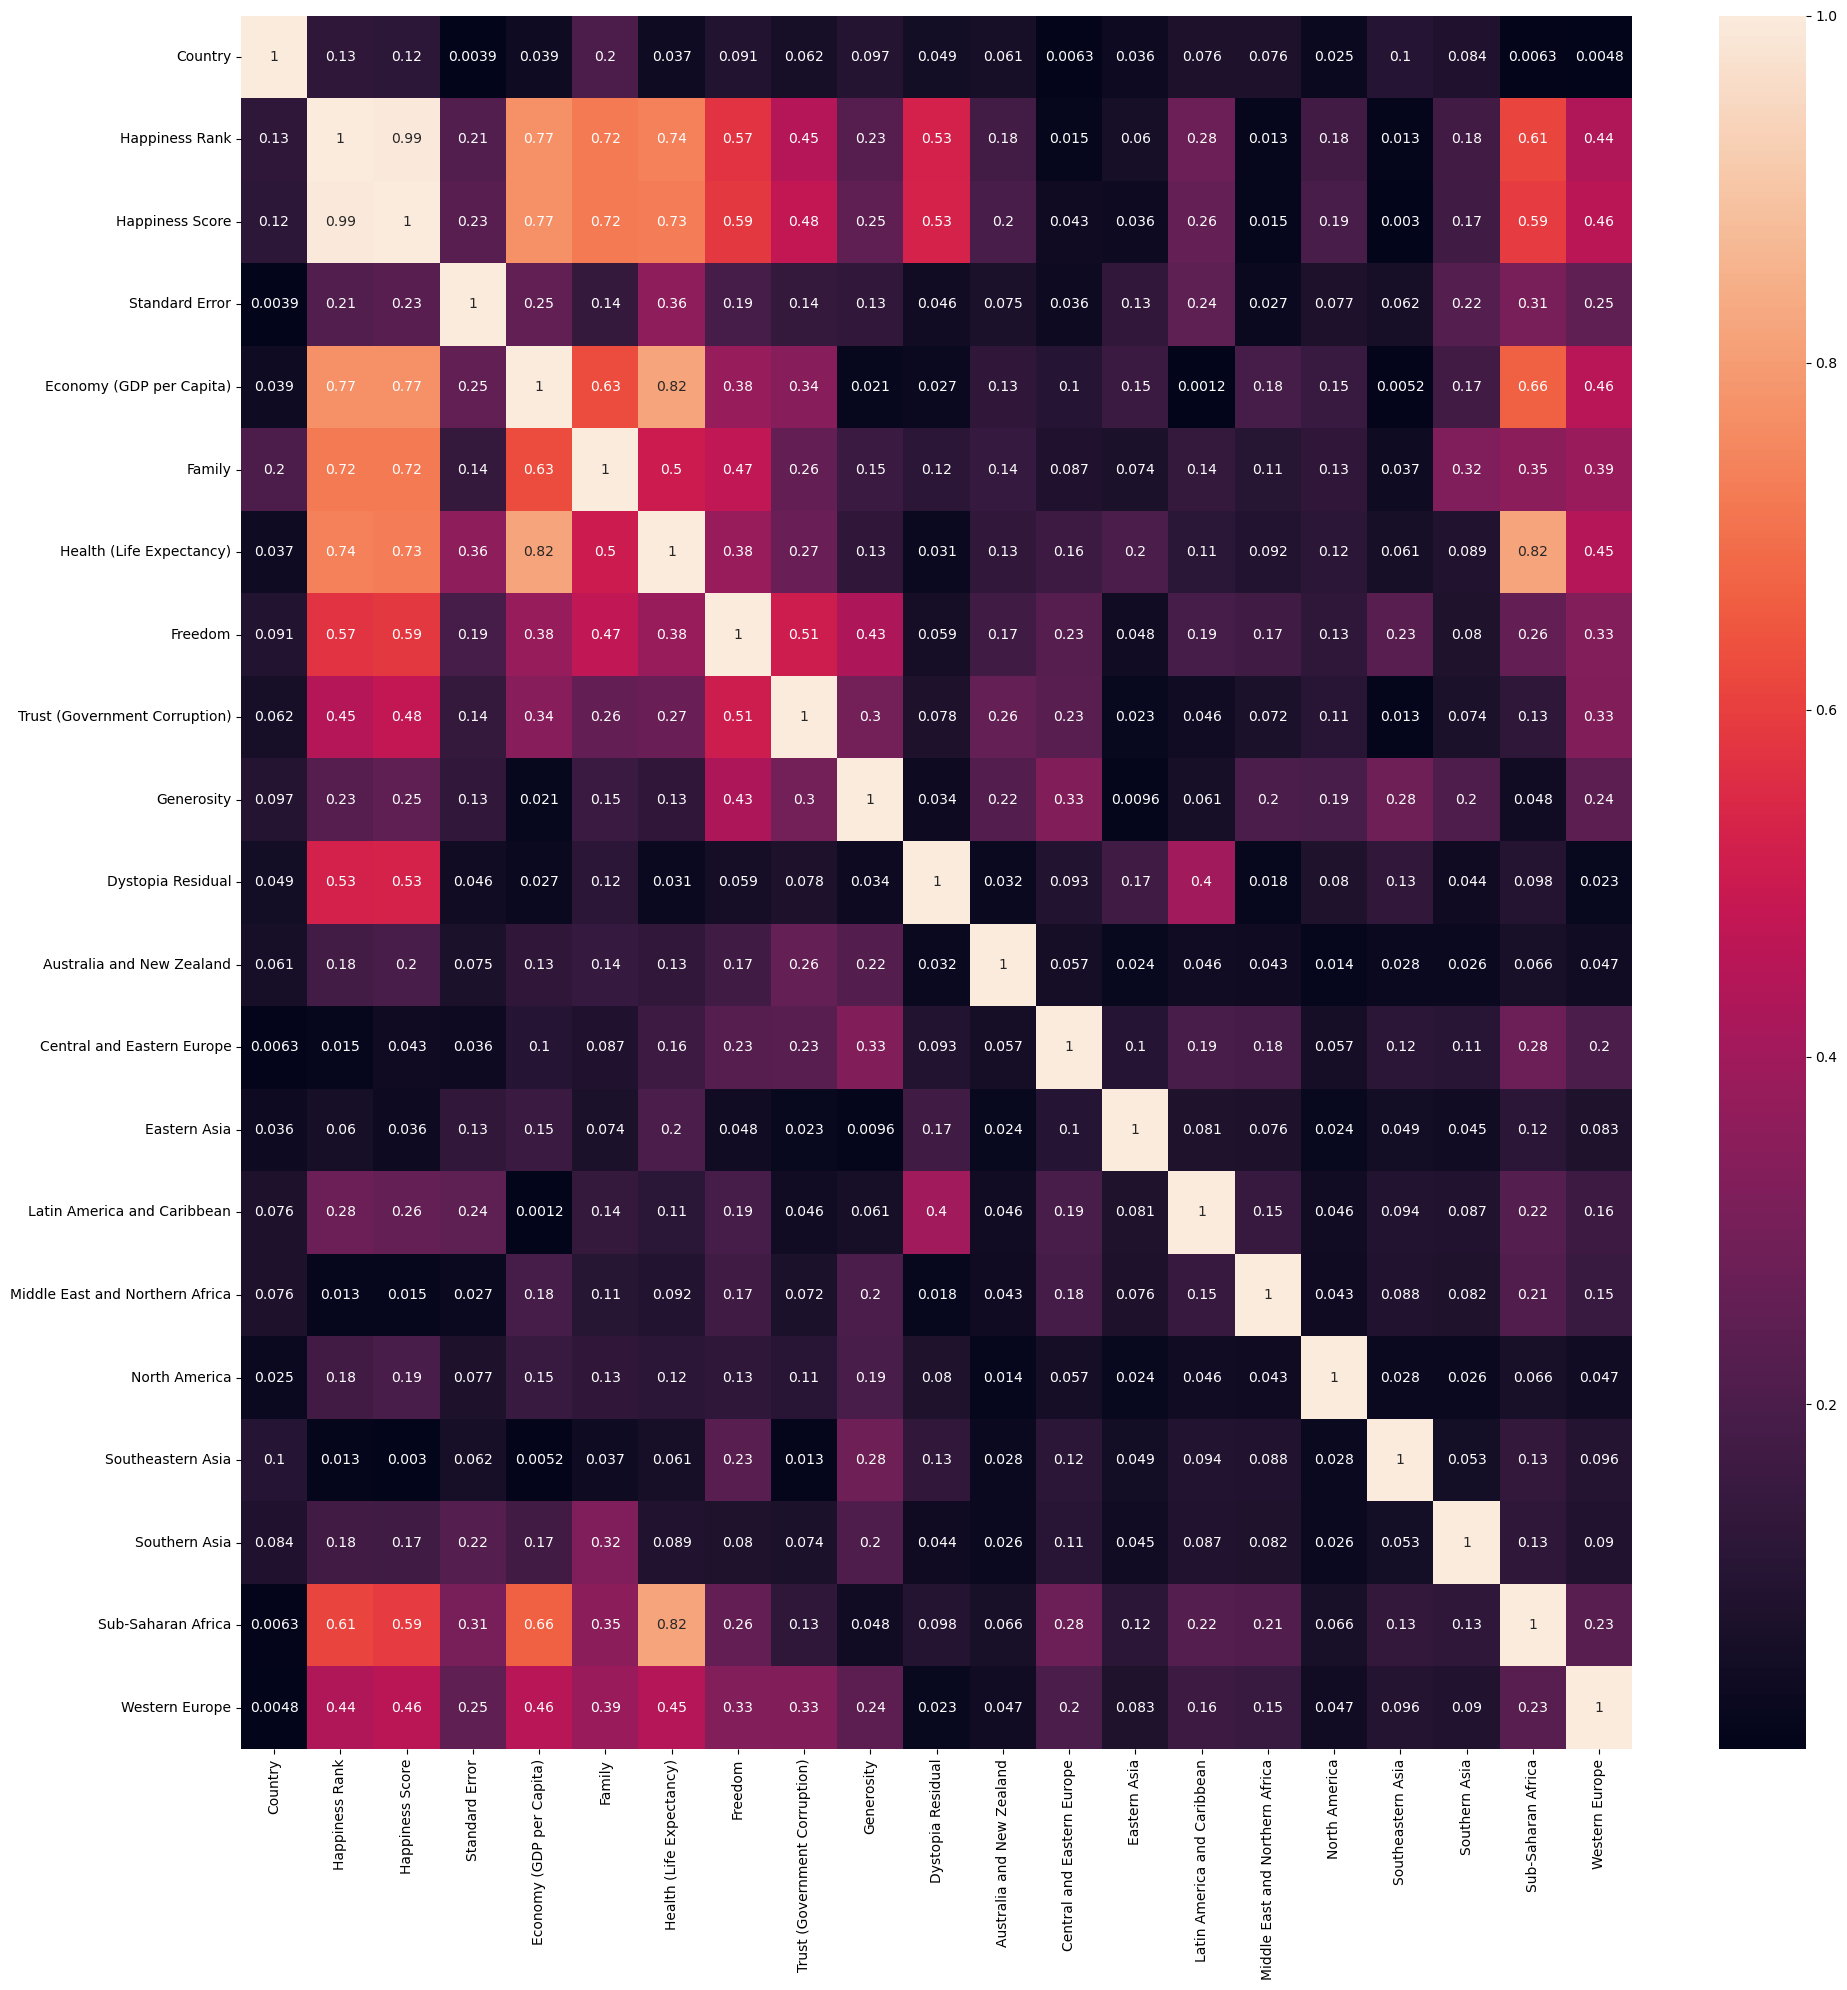

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- it seems that there is mutli-colinearity between health and economy but from domain knowledge we know that there is no relation between them

### Standerdization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.26826032, -1.71390512, -0.95033703, ..., -0.22202652,
        -0.56443252,  2.4688536 ],
       [-0.41741515, -1.69153548,  0.37856182, ..., -0.22202652,
        -0.56443252,  2.4688536 ],
       [-0.87714482, -1.66916583, -1.04140135, ..., -0.22202652,
        -0.56443252,  2.4688536 ],
       ...,
       [-1.68714472,  1.68628086, -1.32081011, ...,  4.50396651,
        -0.56443252, -0.40504629],
       [-1.40255016,  1.73102015, -0.69272644, ..., -0.22202652,
         1.77169097, -0.40504629],
       [-1.22741505,  1.77575944,  2.17876604, ..., -0.22202652,
         1.77169097, -0.40504629]])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [41]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
51,60.0,99.708550,99.893164
40,47.0,99.704652,99.879040
128,153.0,99.716448,99.872642
766,924.0,99.706380,99.870145
454,554.0,99.703304,99.869705
...,...,...,...
615,744.0,99.785922,99.504254
99,122.0,99.793848,99.502960
108,131.0,99.778650,99.501856
378,458.0,99.802930,99.500870


- Therefore best random state is 60

In [42]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=60)

## Training models

#### Linear Regression

In [43]:
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    lr_r2_test_score = r2_score(y_test,pred_test)
    print(lr_r2_test_score*100,"%")

99.893163961171 %


In [44]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(3,10):
    # Set the number of folds for cross-validation
    num_folds = i
    model=LinearRegression()

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Calculate the average MSE score
    avg_mse_score = np.mean(r2_scores)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  3 Average r2 score: 99.57228 Difference =  0.3209
CV =  4 Average r2 score: 99.5883 Difference =  0.3049
CV =  5 Average r2 score: 99.58224 Difference =  0.3109
CV =  6 Average r2 score: 99.61324 Difference =  0.2799
CV =  7 Average r2 score: 99.62128 Difference =  0.2719
CV =  8 Average r2 score: 99.57733 Difference =  0.3158
CV =  9 Average r2 score: 99.61472 Difference =  0.2784


- cv = 7 gives best result

In [45]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [46]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=LinearRegression()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.621282 % 
r2 score =  99.8932 % 
Difference =  0.2719 %



##### DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred_test = dtr.predict(x_test)
dtr_r2_test_score = r2_score(y_test,dtr_pred_test)
print(dtr_r2_test_score*100,"%")

99.65528436213016 %


In [48]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=DecisionTreeRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.275018 % 
r2 score =  99.6553 % 
Difference =  0.3803 %



##### RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_r2_test_score = r2_score(y_test,rfr_pred_test)

print(rfr_r2_test_score*100,"%")

99.85621799102911 %


In [50]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=RandomForestRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.554288 % 
r2 score =  99.8562 % 
Difference =  0.3019 %



#### AdaBoostRegressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred_test = abr.predict(x_test)
abr_r2_test_score = r2_score(y_test,abr_pred_test)
print(abr_r2_test_score*100,"%")

99.6313637101809 %


In [52]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=AdaBoostRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.217023 % 
r2 score =  99.6314 % 
Difference =  0.4143 %



#### GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_r2_test_score = r2_score(y_test,gbr_pred_test)
print(gbr_r2_test_score*100,"%")

99.86485399951403 %


In [54]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=GradientBoostingRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.63636 % 
r2 score =  99.8649 % 
Difference =  0.2285 %



#### XGBRegressor

In [55]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred_test = xgbr.predict(x_test)
xgbr_r2_test_score = r2_score(y_test,xgbr_pred_test)
print(xgbr_r2_test_score*100,"%")

99.27262270852775 %


In [56]:
#best cv score at cv = 7
# Set the number of folds for cross-validation
num_folds = 7
model=XGBRegressor()

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True,random_state=566)

# Initialize an empty list to store the MSE scores
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    # Get the training and test sets for this fold
    X_train_1, X_test_1 = x.iloc[train_index], x.iloc[test_index]
    y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train_1, y_train_1)

    # Make predictions on the test data
    y_pred = model.predict(X_test_1)

    # Calculate the MSE for this fold and append to the list
    r2_scores.append(r2_score(y_test_1, y_pred))

# Calculate the average MSE score
avg_r2_score = np.mean(r2_scores)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  99.025799 % 
r2 score =  99.2726 % 
Difference =  0.2468 %



In [57]:
ms_df

,Model,CV score,Test accuracy,Difference
0,Linear regression,99.6213,99.8932,0.2719
1,Decision Tree regression,99.2750,99.6553,0.3803
2,Random forest regression,99.5543,99.8562,0.3019
3,Ada Boost regression,99.2170,99.6314,0.4143
4,Gradient Boost regression,99.6364,99.8649,0.2285
5,XGBoost regression,99.0258,99.2726,0.2468


- Gboost is giving max r2 score with least difference

### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'max_depth':[2,3,4,5],
             'learning_rate':[0.01,0.05,0.02,0.1,0.2,0.5],
             'criterion':['friedman_mse', 'squared_error', 'mae'],
             'n_estimators':[100,110,120,130],}

In [59]:
gcv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_parm,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mae', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 110}

In [60]:
final_model = GradientBoostingRegressor(learning_rate= 0.1,max_depth= 3,n_estimators= 120,criterion='mae')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [61]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
mae_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,'\nMean absolute error = ',mae_score)


R2 Score =  0.9986905268202732 
Mean Squared error =  0.029962064129206864 
Mean absolute error =  0.0017546980314477074


Text(0.5, 1.0, 'Actual vs Predicted Test')

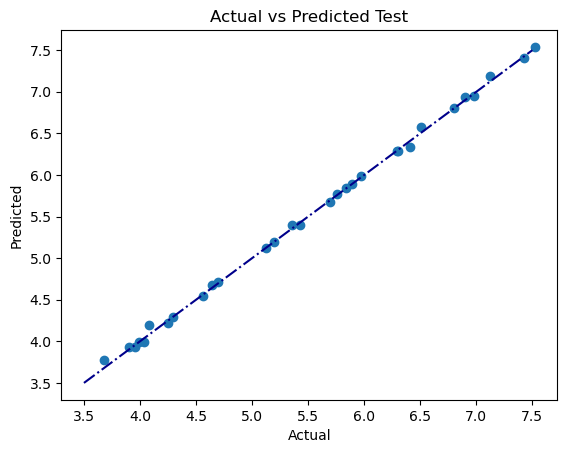

In [62]:
plt.scatter(y_test, final_model_test_pred)

plt.plot([3.5,7.5],[3.5,7.5],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test')

### Saving Model

In [63]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

##### from graph and r2 score we can confidently say that our model predicted 99% of data accurately